## Ejercicios de pair programming del 19 diciembre: SEABORN


NOTA Somos analistas y no nos vale con sacar las gráficas. Incluid una celda de markdown donde expliqueis que es lo que estamos viendo en las gráficas, es decir, haced una interpretación de los resultados.

In [1]:
#importamos las librerias necesarias
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#abrimos el csv
df = pd.read_csv("files/tiburon3.csv")

1. Usando la librería seaborn, crea una gráfica de barras que muestre el número de personas que han hecho cada actividad en cada año. 

Hacedlo solo desde el 2015. Os podrá salir una gráfica un poco fea, no os preocupeis, es lo que esperamos.

In [3]:
#exploramos el df
df.columns

Index(['Unnamed: 0', 'case_number', 'year', 'type', 'country', 'area',
       'location', 'activity', 'name', 'sex_', 'age', 'time', 'species_',
       'href', 'siglo', 'fatal_(y/n)', 'injury', 'date'],
      dtype='object')

In [4]:
df.head()

,Unnamed: 0,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo,fatal_(y/n),injury,date
0,0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,1,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,Y,FATAL,03-Jun-2018
2,2,2018.05.26.b,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,17h00,"Bull shark, 6'",http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Lower left leg bitten,26-May-2018
3,3,2018.05.24,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Morning,Grey reef shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Minor bite to hand by captive shark. PROVOKED ...,24-May-2018
4,4,2018.05.13.a,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,21,08h15,Invalid incident,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Injured by teeth of a dead porbeagle shark he ...,13-May-2018


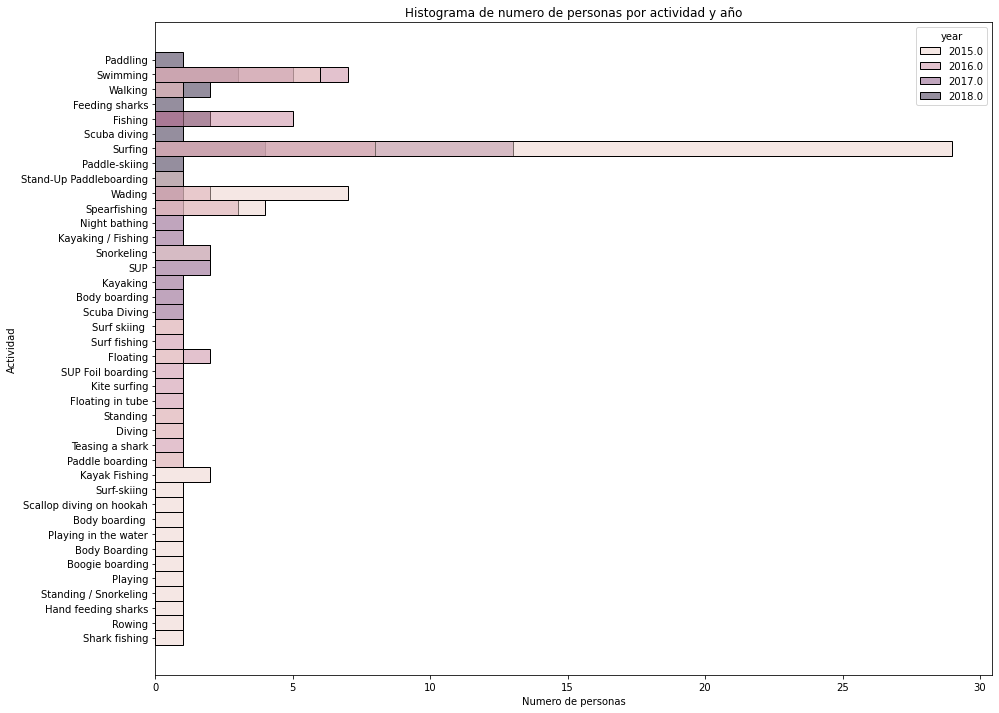

In [5]:
plt.figure(figsize =(15,12))

fig = sns.histplot(y='activity', data = df[df["year"] >= 2015], hue= 'year', bins = 15)

fig.set(ylabel='Actividad', xlabel = 'Numero de personas')

fig.set_title('Histograma de numero de personas por actividad y año' )


plt.show()

Podemos interpretar que la actividad que mas personas estaban realizando cuando un tiburon les ataco es 'surfing' y existen mas registros de dichos ataques en el año 2015. Seguido de 'wading' y 'swimming'

2. Usando la librería seaborn, crea una gráfica de barras que muestre el número de ataques que han ocurrido cada año en función del sexo. 

Hacedlo solo desde el 2015.

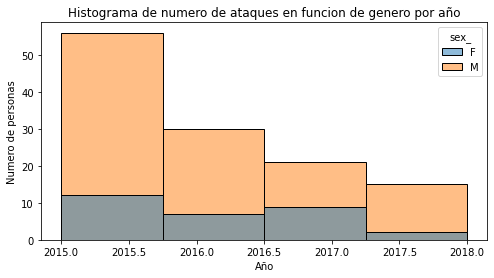

In [6]:
plt.figure(figsize =(8,4))

fig = sns.histplot(x='year', data = df[df["year"] >= 2015], hue = 'sex_', bins = 4)

fig.set(xlabel='Año', ylabel = 'Numero de personas')

fig.set_title('Histograma de numero de ataques en funcion de genero por año' )


plt.show()

Se puede deducir que en el año 2015 hay mas registros de ataques y se mantiene a lo largo del tiempo un mayor numero de ataques a hombres que a mujeres.

3. ¿Cuántos ataques hubo por año? Seleccionad solo desde el año 1500.

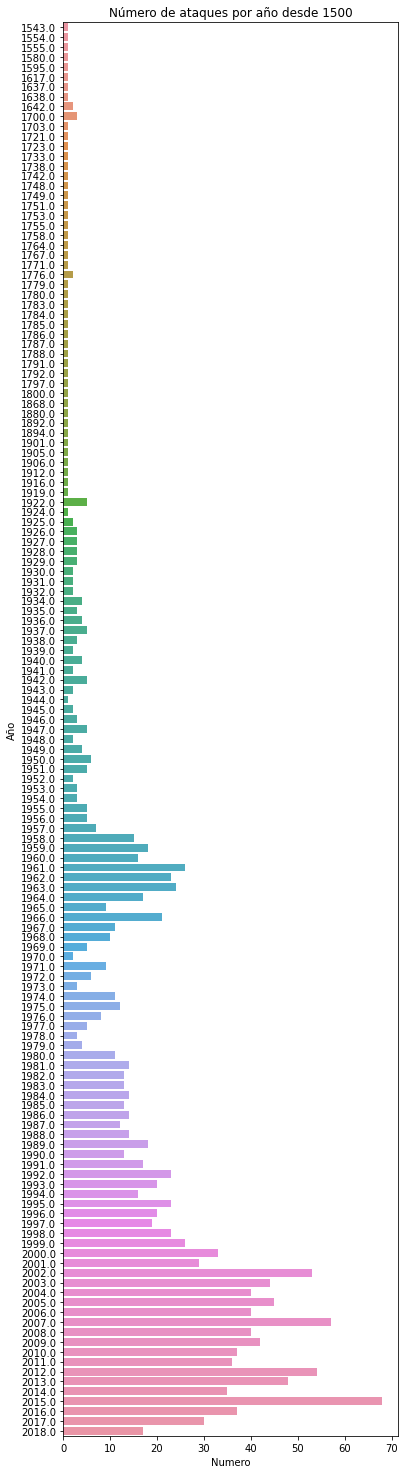

In [7]:
plt.figure(figsize =(6,26))

fig = sns.countplot(y='year', data = df[df["year"] >= 1500])

fig.set(ylabel='Año', xlabel= 'Numero' )

fig.set_title('Número de ataques por año desde 1500')

plt.show()

Podemos interpretar que antes de 1922 hay algun registro anecdotico, y hasta 1950 no empieza a haber registros mas constantes. Los años con mas registros son 2002, 2007, 2012 y 2015.

4.Seleccionad solo los registros de USA, AUSTRALIA y SOUTH AFRICA. Muestra el número de ataques por país y año desde el año 1900.

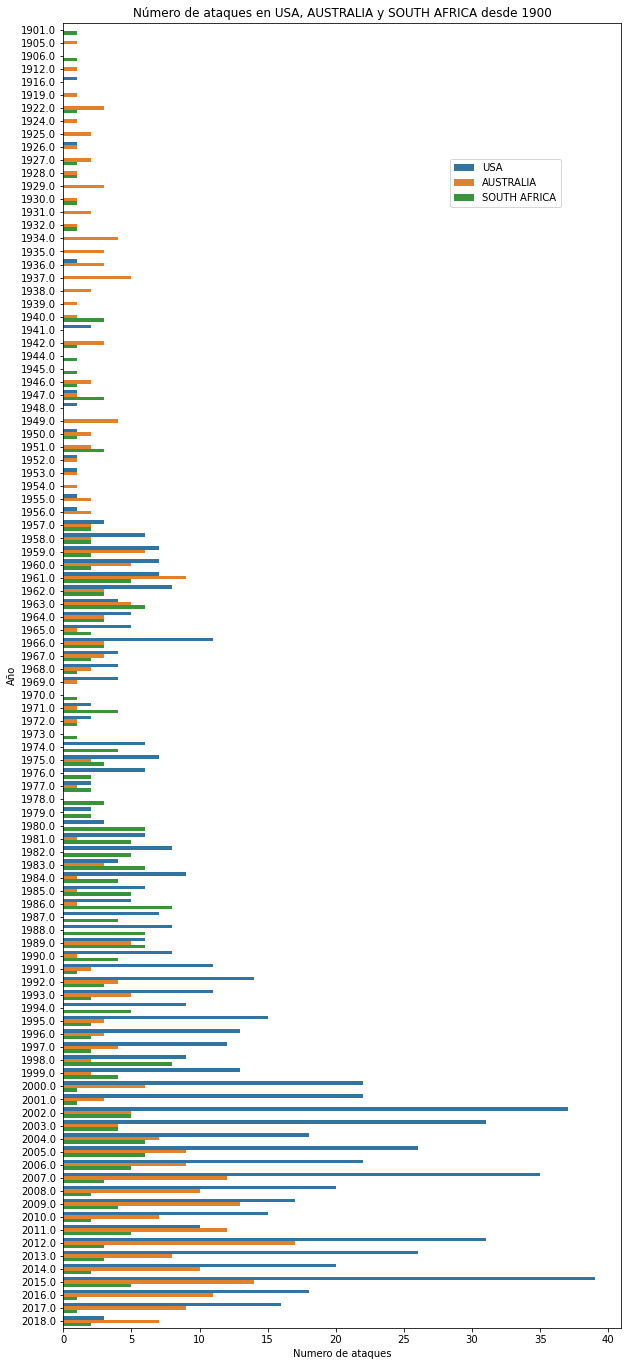

In [8]:
plt.figure(figsize =(10,24))

fig = sns.countplot(y='year', hue = "country", data = df[((df["country"]== "USA") | (df["country"]== "AUSTRALIA") | (df["country"]== "SOUTH AFRICA")) & (df["year"] >=1900)])

fig.set(ylabel='Año', xlabel= 'Numero de ataques' )

fig.set_title('Número de ataques en USA, AUSTRALIA y SOUTH AFRICA desde 1900')

plt.legend(bbox_to_anchor = (0.9, 0.9))

plt.show()

Deducimos que entre 1900 y 1955 hay mas registros en Australia pero a partir de 1950 los registros en USA empiezan a aumentar. Siendo mayoritarios en el S-XXI

-Entre 1977 y 1989 los ataques entre USA y Australia se igualaron

5. Realizad un boxplot donde se muestre los principales estadísticos del número de ataques por país.

In [9]:
df2 = pd.DataFrame(df.groupby("country")["case_number"].count()).reset_index()

In [18]:
df2.sort_values(by="case_number")

,country,case_number
47,LIBYA,1
46,LEBANON,1
24,FEDERATED STATES OF MICRONESIA,1
73,SCOTLAND,1
71,RUSSIA,1
...,...,...
59,NEW ZEALAND,21
4,BAHAMAS,29
78,SOUTH AFRICA,234
3,AUSTRALIA,343


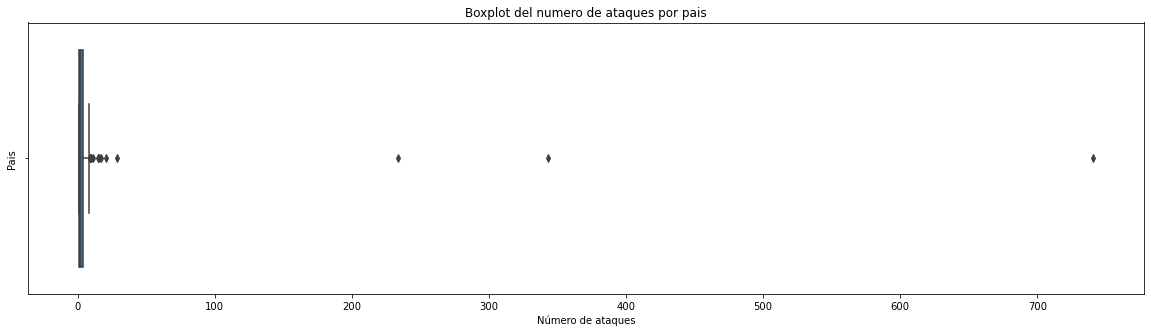

In [21]:
plt.figure(figsize =(20,5))

fig = sns.boxplot(x= 'case_number' , data = df2)

fig.set(ylabel='Pais', xlabel= "Número de ataques")

fig.set_title('Boxplot del numero de ataques por pais')


plt.show()

Podemos deducir que en la mayoria de los paises han tenido entre 5 y 10 casos, aproximadamente, habiendo solo unos pocos outliers en los que ha habido un número mucho mayor